In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

import graphviz
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import top_k_accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
data = pd.read_csv("../teste_OHE_curso_treinamento.csv")

X = data.iloc[:, 0:225]
Y = data.iloc[:, -1]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [4]:
scaler_train = StandardScaler()

In [5]:
scaler_train.fit(X_train)
normalized_train = scaler_train.transform(X_train)
normalized_train

array([[-0.0356979 ,  1.40318206, -1.39441362, ..., -0.47660326,
        -0.35151679,  0.28797977],
       [-0.0356979 , -0.60157525,  0.60254008, ..., -0.47660326,
        -0.35151679,  1.01759169],
       [-0.0356979 , -0.1272201 ,  0.13003137, ..., -0.19973614,
         0.51704332, -0.04531348],
       ...,
       [-0.0356979 , -0.71207844,  0.71261313, ..., -0.47660326,
        -0.35151679,  0.2526392 ],
       [-0.0356979 , -1.09270053,  1.09175363, ...,  1.79370712,
        -0.35151679,  0.10892085],
       [-0.0356979 , -0.64159286,  0.64240192, ...,  0.36425244,
        -0.35151679, -0.0401204 ]])

In [6]:
scaler_test = StandardScaler()

In [7]:
scaler_test.fit(X_test)
normalized_test = scaler_test.transform(X_test)
normalized_test

array([[-0.0922025 , -1.11704161,  1.11859718, ..., -0.46753094,
        -0.32932818, -0.46168587],
       [-0.0922025 , -0.23161393,  0.23445452, ...,  0.24694206,
        -0.32932818, -0.46168587],
       [-0.0922025 ,  0.88992781, -0.88545951, ..., -0.46753094,
        -0.32932818, -0.46168587],
       ...,
       [-0.0922025 , -0.14592738,  0.14889233, ..., -0.46753094,
         1.8632069 , -0.09759741],
       [-0.0922025 ,  0.84629804, -0.84189306, ...,  1.64482403,
         0.04006632, -0.21632191],
       [-0.0922025 , -1.11704161,  1.11859718, ...,  1.55680924,
        -0.32932818, -0.46168587]])

In [19]:
scaler_train_MM = MinMaxScaler()

normalized_train_MM = scaler_train_MM.fit_transform(X_train)
normalized_train_MM

array([[0.        , 0.02626642, 0.1463621 , ..., 0.1       , 0.03333333,
        0.02167488],
       [0.        , 0.00375235, 0.0321489 , ..., 0.        , 0.        ,
        0.00098522],
       [0.        , 0.00281426, 0.00169205, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.00093809, 0.01099831, ..., 0.        , 0.        ,
        0.00098522],
       [0.        , 0.        , 0.01522843, ..., 0.05      , 0.        ,
        0.00098522],
       [0.        , 0.00187617, 0.01945854, ..., 0.025     , 0.        ,
        0.00098522]])

In [20]:
scaler_test_MM = MinMaxScaler()

normalized_test_MM = scaler_test_MM.fit_transform(X_test)
normalized_test_MM

array([[0.        , 0.        , 0.00377834, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00965251, 0.03400504, ..., 0.02857143, 0.        ,
        0.        ],
       [0.        , 0.00579151, 0.00503778, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.02316602, 0.05667506, ..., 0.05714286, 0.        ,
        0.00847458],
       [0.        , 0.0019305 , 0.00629723, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.00772201, 0.00125945, ..., 0.        , 0.        ,
        0.        ]])

In [8]:
classifier = RandomForestClassifier()

In [9]:
param_grid = {"n_estimators": [60, 100, 200],
            "criterion":['gini', 'entropy'],
              "min_samples_leaf": [10, 30, 50],
              "ccp_alpha": [0.001, 0.0015, 0.0017, 0.002]}

In [6]:
search = HalvingGridSearchCV(classifier, param_grid, scoring="f1_weighted").fit(X_train, y_train) 

In [10]:
search_normalized = HalvingGridSearchCV(classifier, param_grid, scoring="f1_weighted").fit(normalized_train, y_train) 

In [7]:
search.best_params_ 

{'ccp_alpha': 0.0017,
 'criterion': 'entropy',
 'min_samples_leaf': 10,
 'n_estimators': 100}

In [13]:
search.score(X_test, y_test)

0.4437857173167798

In [11]:
search_normalized.score(normalized_test, y_test)

0.4472537887574527

In [8]:
y_score = search.predict_proba(X_test)

In [25]:
y_score = search_normalized.predict_proba(normalized_test_MM)

In [27]:
top_k_accuracy_score(y_test, y_score, k=3, labels=[1, 2, 3, 4, 5])

0.9263698630136986

In [14]:
y_pred = search.predict(X_test)

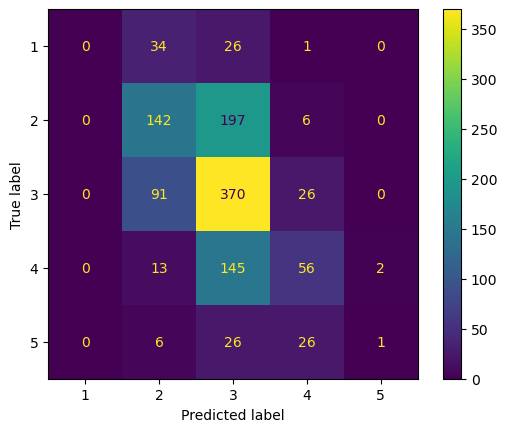

In [16]:
cm = confusion_matrix(y_test, y_pred, labels=search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=search.classes_)
disp.plot()
plt.show()